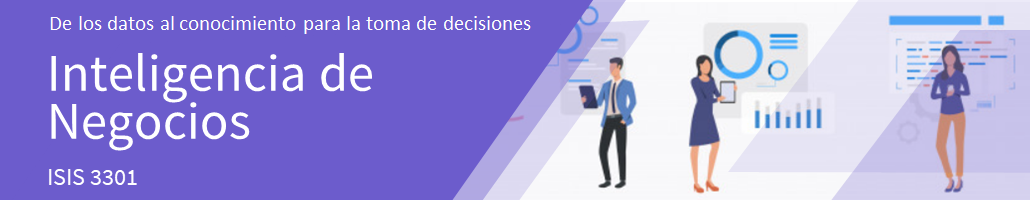

## Tarea de clasificación.

El objetivo de este notebook es mostrar cómo resolvimos la tarea de clasificación en un árbol de decisión con la librería scikit-learn.

1. Importación de librerías.
2. Carga de los datos.
3. Limpieza de los datos.
4. Implementación de DBScan.
5. Interpretación del modelo.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

### 2. Carga de los datos
A través de la librería pandas resalizamos la carga de datos del archivo "202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv". el separador que se usará para la carga es ";".

In [2]:
# Se cargan los datos. 
df=pd.read_csv('202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv', sep=';', index_col=0)

In [3]:
# Cantidad de datos y número de variables
df.shape

(660, 10)

In [4]:
df.dtypes

Customer               object
Limit_bal              object
Sex                    object
Education              object
Marriage               object
Age                    object
Total_Credit_Cards     object
Total_visits_bank      object
Total_visits_online    object
Total_calls_made       object
dtype: object

Como podemos ver hay datos que deberían ser numéricos, pero por alguna razón estos son tipo "object".

In [5]:
# Mostrar los datos
df.head()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073,20000,Female,2,Married,24,2,1,1,0
2,38414,120000,Female,2,Single,26,3,0,10,9
3,17341,90000,Female,2,Single,34,7,1,3,4
4,40496,50000,Female,2,Married,37,5,1,1,?
5,47437,50000,Male,2,Married,57,6,0,12,3


La razón por la que algunos datos son tipo "object", es por un error que hay en los datos, donde ciertas columnas que tienen datos numéricos poseen el caracter "-" o el caracter "?". Este caracter hace que los datos no puedan ser numéricos, por lo que es necesario deshacerse de las filas que poseen este caracter previamente mencionado.

### 3 Limpieza de los datos
A través de la librería pandas resalizamos la carga de datos del archivo "202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv". el separador que se usará para la carga es ";".

In [6]:
indexNames = df[df['Customer'] == '-'].index
df1 = df.drop(indexNames)
df1.shape

(658, 10)

In [7]:
indexNames = df1[df1['Limit_bal'] == '-'].index
df2 = df1.drop(indexNames)
df2.shape

(658, 10)

In [8]:
indexNames = df2[df2['Sex'] == '9'].index
df3 = df2.drop(indexNames)
df3.shape

(657, 10)

In [9]:
indexNames = df3[df3['Sex'] == '-'].index
df4 = df3.drop(indexNames)
df4.shape

(657, 10)

In [10]:
df4["Sex"].replace({"M": "Male", "Mael": "Male"}, inplace=True)
df4.shape

(657, 10)

In [11]:
df4["Sex"].replace({"f": "Female", "F": "Female", "Femael": "Female", "Fmale": "Female"}, inplace=True)
df4.shape

(657, 10)

In [12]:
df4["Education"].replace({"-": "5", "6": "5", "ABC": "5"}, inplace=True)
df4.shape

(657, 10)

In [13]:
indexNames = df4[df4['Marriage'] == '?'].index
df4.drop(indexNames, inplace=True)
df4.shape

(656, 10)

In [14]:
df4["Marriage"].replace({"0": "Others", "1": "Single", "2": "Married"}, inplace=True)
df4.shape

(656, 10)

In [15]:
indexNames = df4[df4['Marriage'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(656, 10)

In [16]:
indexNames = df4[df4['Age'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(656, 10)

In [17]:
indexNames = df4[df4['Age'] == '2202'].index
df4.drop(indexNames, inplace=True)
df4.shape

(655, 10)

In [18]:
indexNames = df4[df4['Age'] == '36745'].index
df4.drop(indexNames, inplace=True)
df4.shape

(654, 10)

In [19]:
indexNames = df4[df4['Age'] == '789'].index
df4.drop(indexNames, inplace=True)
df4.shape

(653, 10)

In [20]:
indexNames = df4[df4['Total_Credit_Cards'] == '123456789'].index
df4.drop(indexNames, inplace=True)
df4.shape

(652, 10)

In [21]:
indexNames = df4[df4['Total_Credit_Cards'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(651, 10)

In [22]:
indexNames = df4[df4['Total_visits_bank'] == '?'].index
df4.drop(indexNames, inplace=True)
df4.shape

(649, 10)

In [23]:
indexNames = df4[df4['Total_visits_bank'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(649, 10)

In [24]:
indexNames = df4[df4['Total_visits_online'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(649, 10)

In [25]:
indexNames = df4[df4['Total_calls_made'] == '?'].index
df4.drop(indexNames, inplace=True)
df4.shape

(648, 10)

In [26]:
indexNames = df4[df4['Total_calls_made'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(648, 10)

In [27]:
dl = df4
dl['Customer']=dl['Customer'].astype(int)
dl['Limit_bal']=dl['Limit_bal'].astype(int)
dl['Education']=dl['Education'].astype(int)
dl['Age']=dl['Age'].astype(int)
dl['Total_Credit_Cards']=dl['Total_Credit_Cards'].astype(int)
dl['Total_visits_bank']=dl['Total_visits_bank'].astype(int)
dl['Total_visits_online']=dl['Total_visits_online'].astype(int)
dl['Total_calls_made']=dl['Total_calls_made'].astype(int)
dl.dtypes

Customer                int32
Limit_bal               int32
Sex                    object
Education               int32
Marriage               object
Age                     int32
Total_Credit_Cards      int32
Total_visits_bank       int32
Total_visits_online     int32
Total_calls_made        int32
dtype: object

Ya tenemos las columnas con los datos numéricos. Lo siguiente es eliminar las columnas que no sirven para el algoritmo DBScan.

In [28]:
dl.isnull().sum()

Customer               0
Limit_bal              0
Sex                    0
Education              0
Marriage               0
Age                    0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No hay datos nulos en el Data Frame

In [29]:
dl.drop('Sex', axis=1, inplace=True)
dl.drop('Marriage', axis=1, inplace=True)
dl.shape

(648, 8)

Quitaremos las columnas de Sex y Marriage, ya que son categóricas y no sirven para generar clusters de datos.

### 4. Implementación de DBScan
Ya tenemos las columnas necesarias para implementar el algoritmo DBScan, lo siguiente será estandarizar los datos y crear las gráficas con los clusters

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = dl

Estandarizamos el dataframe para que sea más fácil para el algoritmo agrupar los datos.

In [42]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.240356,-1.164245,0.271419,-1.185193,-1.269835,-0.877844,-0.540102,-1.240474
1,-0.654785,-0.389278,0.271419,-0.970487,-0.807038,-1.491483,2.506198,1.922816
2,-1.475523,-0.621768,0.271419,-0.111661,1.044150,-0.877844,0.136854,0.165433
3,-0.303363,-0.931755,0.271419,2.357464,0.581353,-1.491483,3.183154,-0.186044
4,0.132731,-0.931755,-1.021812,0.210399,-0.807038,-1.491483,-0.540102,1.571339


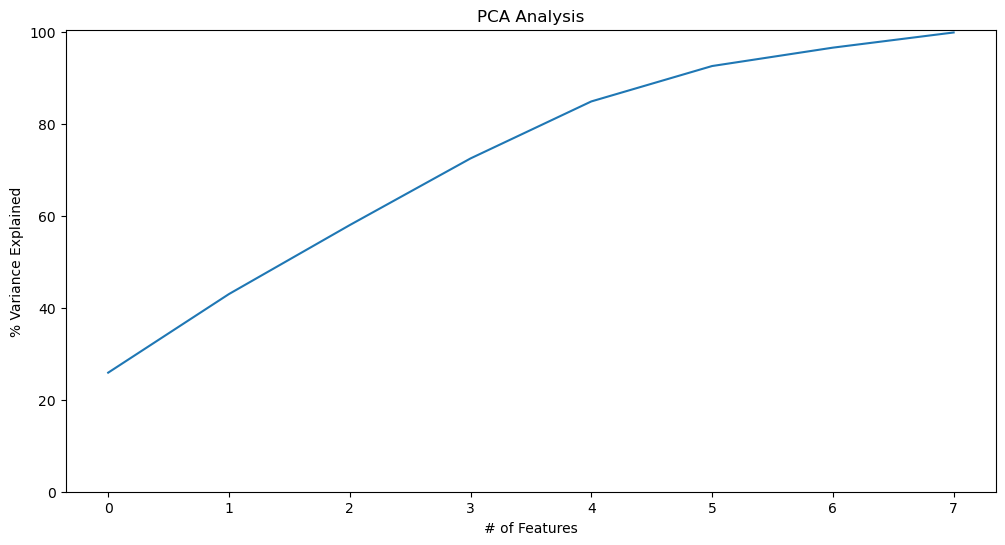

In [43]:
pca = PCA(n_components=8)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)
plt.show()

Por medio de esta gráfica tratamos de hallar el número de features que dberíamos usar en el algoritmo, con el fin de tener un gráfica en 2d usaremos 2 features, el lado de negativo de esto es que el % de varianza será aprox. de un 57%, no es un mal porcentaje, pero este puede mejorar.

In [33]:
pca = PCA(n_components=2)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2'])
print(pca.explained_variance_ratio_)

[0.25884534 0.17118545]


Lo siguiente que hacemos es pasar todas las columnas por medio de PCA, y la varianza de estos dos feature son 0.26 y 0.17.

In [34]:
print(abs( pca.components_ ))

[[0.01942387 0.05102286 0.04576523 0.06299964 0.47877397 0.57054824
  0.29002454 0.59337335]
 [0.00319292 0.19210606 0.26363598 0.05431448 0.51224033 0.31301012
  0.68302138 0.25248243]]


Como podemos ver, las columnas que más influyen en la primera feature son: Total_call_made y Total_visits_bank.
Mientras que en la sergunda feature las columnas que más influyen son: Total_visits_online y Total_Credit_cards.
Con el fin de sacar conclusiones de manera más sencilla se asumirá que la primera feature hace referencia a Total_call_made y la segunda a Total_visits_online.

In [35]:
db_default = DBSCAN(eps = 0.4, min_samples = 4).fit(pca_df)
labels = db_default.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 12


Como podemos ver los parámetros que usamos para DBScan fueron epsilon = 0.4 y min_samples = 4. Les dimos estos valores a estos parametros de la siguiente manera, el min_samples obtuvo el valor de cuatro, ya que el # de features es dos, decidimos multiplicar este valor por 2 y que el resultado fuera el número mínimo de samples para crear un cluster. En el caso del epsilon fue un valor que obtuvimos al correr varias veces el código de arriba, es la distancia que menos noise points genera y la que genera un buen número de clusters para generar una respuesta clara.

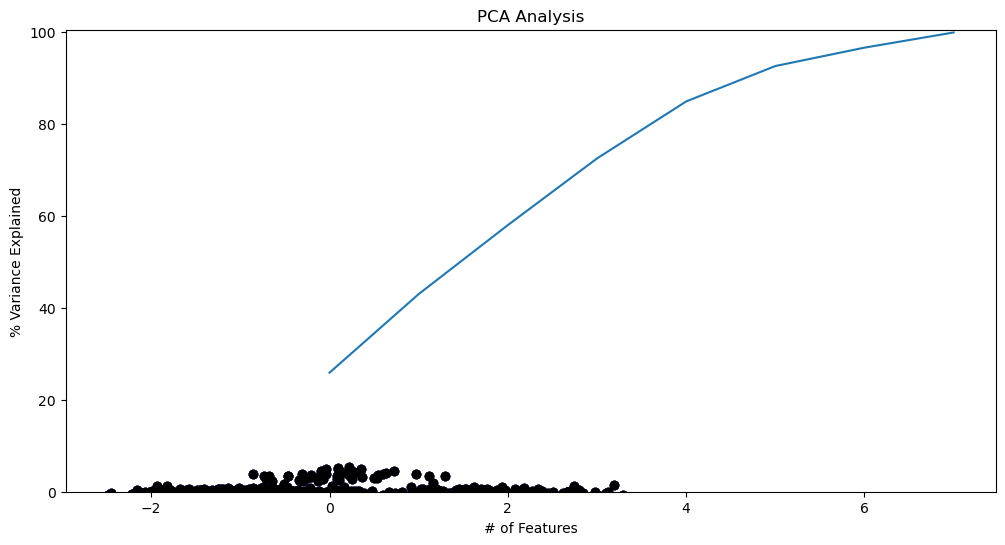

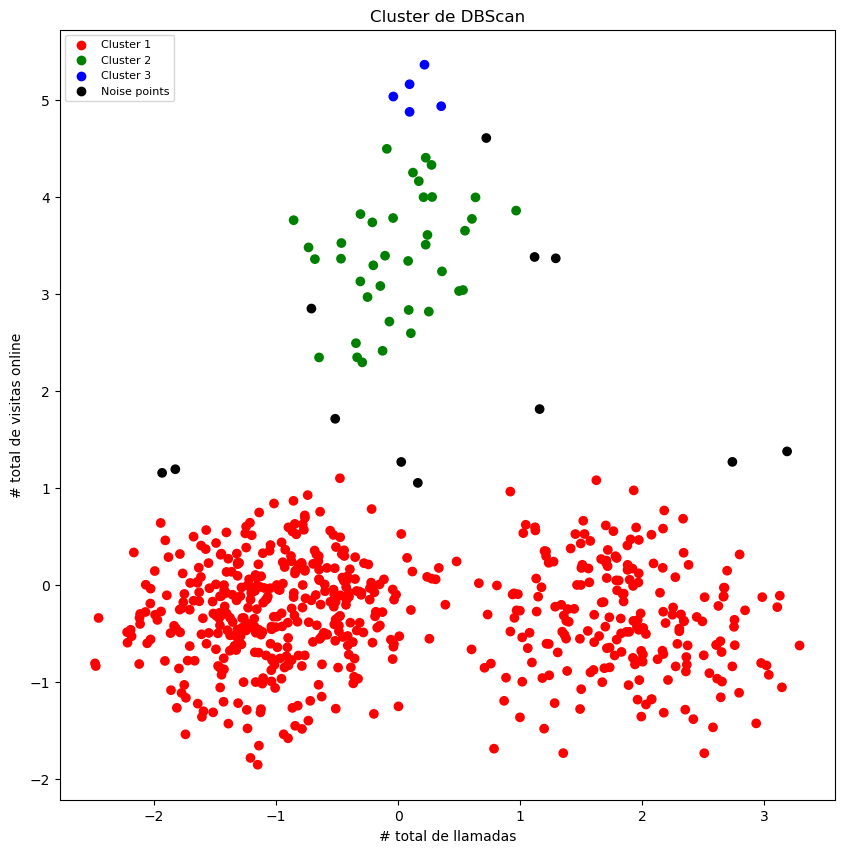

In [36]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(pca_df['pc1'], pca_df['pc2'], color ='r');
g = plt.scatter(pca_df['pc1'], pca_df['pc2'], color ='g');
b = plt.scatter(pca_df['pc1'], pca_df['pc2'], color ='b');
k = plt.scatter(pca_df['pc1'], pca_df['pc2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(10, 10))
plt.scatter(pca_df['pc1'], pca_df['pc2'], c = cvec)

plt.ylabel('# total de visitas online')
plt.xlabel('# total de llamadas')
plt.title('Cluster de DBScan')

# Building the legend
plt.legend((r, g, b, k), ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Noise points'), scatterpoints=1, loc='upper left', fontsize=8)
  
plt.show()

In [37]:
X=dl
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [38]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  0.141599 -0.125659
1  0.888145 -0.223947
2  0.143761 -0.664731
3  0.394110  0.080240
4  0.749957 -0.021550


In [39]:

# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.003, min_samples = 3).fit(X_principal)
labels = db_default.labels_

Ya tenemos los datos corregidos, los datos que eran tipo "object" ahora son enteros. Ya que se hizo este proceso se procederá a la limpieza y preparación de los datos.

### 5. Interpretación del modelo
Una vez tenemos los resultados de implementar el algoritmo DBScan interpretaremos los resultados de este para poder generar recomendaciones para la empresa.